In [43]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import select_features
from pycaret.classification import *
from tsfresh import extract_features
from dataprep.eda import create_report
from tsfresh import extract_relevant_features
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from notebooks_preprocessing_and_dataframe_creation import preprocessing_functions

In [23]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [24]:
metric = 'AUC' # F1 or AUC

In [25]:
df = pd.read_pickle('../data/unified_dataframe/weekly_unprocessed.pkl')
df

,id,date,label_panas_negative_affect,label_stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,Below average,Below average,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-06-07,Below average,Average,34.476865,56.57,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-06-28,Below average,Above average,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-07-19,Below average,Average,34.254286,57.33,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-07-26,Below average,Average,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,621e339967b776a240e502de,2021-12-14,Below average,Below average,34.303759,46.311,56.468,96.5,11.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280,621e339967b776a240e502de,2021-12-20,Below average,Average,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,621e339967b776a240e502de,2021-12-27,Below average,Average,35.107574,54.325,47.929,95.4,12.2,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
282,621e339967b776a240e502de,2022-01-03,Below average,Average,34.957428,52.81,47.801,94.9,12.4,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
df_pre = pd.read_pickle('../data/unified_dataframe/weekly_data_preprocessed.pkl')
df_pre

,id,date,label_panas_negative_affect,label_stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Steps_hour18,Steps_hour19,Steps_hour20,Steps_hour21,Steps_hour22,Steps_hour23,panas-1,stai-1,panas-2,stai-2
0,621e2e8e67b776a24055b564,2021-05-31,Below average,Below average,34.408304,57.481,94.303,96.1,14.8,81.0,...,3226.0,530.0,72.0,52.0,421.0,38.0,Below average,Average,Below average,Average
1,621e2e8e67b776a24055b564,2021-06-07,Below average,Average,34.476865,56.570,34.617,96.1,14.4,83.0,...,181.0,3079.0,37.0,173.0,179.0,45.0,Below average,Below average,Below average,Average
2,621e2e8e67b776a24055b564,2021-06-28,Below average,Above average,34.418045,53.006,34.617,96.1,15.6,76.0,...,3190.0,191.0,23.0,95.0,23.0,36.0,Below average,Average,Below average,Below average
3,621e2e8e67b776a24055b564,2021-07-19,Below average,Average,34.254286,57.330,100.374,96.1,15.0,75.0,...,1001.0,2215.0,231.0,1579.0,57.0,162.0,Below average,Above average,Below average,Average
4,621e2e8e67b776a24055b564,2021-07-26,Below average,Average,34.515655,59.798,98.515,96.1,15.4,74.0,...,2389.0,3393.0,162.0,62.0,15.0,151.0,Below average,Average,Below average,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,621e375b67b776a240290cdc,2021-06-01,Above average,Above average,34.480120,63.323,21.579,96.1,17.4,72.0,...,817.0,1384.0,2000.0,3158.0,536.0,33.0,Above average,Above average,Above average,Below average
280,621e375b67b776a240290cdc,2021-06-08,Above average,Above average,34.251482,63.730,20.485,96.1,17.0,78.0,...,3403.0,6047.0,2326.0,1469.0,1528.0,222.0,Above average,Above average,Above average,Above average
281,621e375b67b776a240290cdc,2021-06-22,Above average,Above average,34.588002,65.664,19.511,96.1,17.0,80.0,...,290.0,210.0,1857.0,5394.0,2275.0,44.0,Above average,Above average,Above average,Above average
282,621e375b67b776a240290cdc,2021-07-06,Above average,Above average,34.720564,60.287,23.620,96.1,17.0,75.0,...,254.0,267.0,299.0,259.0,252.0,176.0,Above average,Above average,Above average,Above average


# Predict panas from weekly dataframe

In [27]:
panas = df.drop(columns=['date', 'label_stai_stress_category'])

In [28]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(panas)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [29]:
s = setup(data=train_data, target='label_panas_negative_affect', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,label_panas_negative_affect
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(182, 64)"
5,Missing Values,True
6,Numeric Features,31
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.3771,0.5508,0.3854,0.3939,0.3662,0.0746,0.0756,2.1433
qda,Quadratic Discriminant Analysis,0.3470,0.5100,0.3484,0.1820,0.2106,0.0195,0.0275,0.0433
ada,Ada Boost Classifier,0.2994,0.5095,0.3046,0.3122,0.2871,-0.0485,-0.0471,0.1267
gbc,Gradient Boosting Classifier,0.3228,0.5084,0.3365,0.3440,0.3015,0.0021,0.0081,0.3333
lr,Logistic Regression,0.3295,0.5080,0.3027,0.1965,0.2256,-0.0499,-0.0777,2.9167
lightgbm,Light Gradient Boosting Machine,0.3345,0.5070,0.3422,0.3469,0.3283,0.0060,0.0085,0.5667
dummy,Dummy Classifier,0.3236,0.5000,0.3333,0.1057,0.1591,0.0000,0.0000,0.0167
dt,Decision Tree Classifier,0.3294,0.4997,0.3379,0.3311,0.3154,0.0012,0.0018,0.0167
rf,Random Forest Classifier,0.3465,0.4937,0.3625,0.3625,0.3370,0.0264,0.0304,0.2200
et,Extra Trees Classifier,0.2993,0.4500,0.3076,0.3017,0.2942,-0.0495,-0.0484,0.2200


In [ ]:
plot_model(best, plot='feature')

In [32]:
panas = df_pre.drop(columns=['date', 'label_stai_stress_category'])

In [33]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(panas)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [34]:
s = setup(data=train_data, target='label_panas_negative_affect', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_panas_negative_affect
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(182, 125)"
5,Missing Values,True
6,Numeric Features,97
7,Categorical Features,27
8,Ordinal Features,False
9,High Cardinality Features,False


In [35]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.4345,0.5824,0.4437,0.4739,0.4389,0.1530,0.1617,0.1400
knn,K Neighbors Classifier,0.4054,0.5728,0.4169,0.4143,0.4006,0.1107,0.1130,0.0500
rf,Random Forest Classifier,0.3467,0.5375,0.3565,0.3765,0.3441,0.0261,0.0296,0.1367
gbc,Gradient Boosting Classifier,0.3282,0.5238,0.3346,0.3519,0.3195,-0.0011,-0.0082,0.2667
dummy,Dummy Classifier,0.3237,0.5000,0.3333,0.1058,0.1592,0.0000,0.0000,0.0267
nb,Naive Bayes,0.3233,0.4784,0.3369,0.3409,0.2623,0.0002,0.0105,0.0333
lightgbm,Light Gradient Boosting Machine,0.2935,0.4750,0.2896,0.2762,0.2782,-0.0720,-0.0820,0.3100
lr,Logistic Regression,0.2874,0.4740,0.2927,0.3035,0.2881,-0.0679,-0.0697,0.0367
dt,Decision Tree Classifier,0.2702,0.4495,0.2829,0.2575,0.2582,-0.0885,-0.0946,0.0267
qda,Quadratic Discriminant Analysis,0.2650,0.4461,0.2571,0.2665,0.2617,-0.1098,-0.1125,0.0267


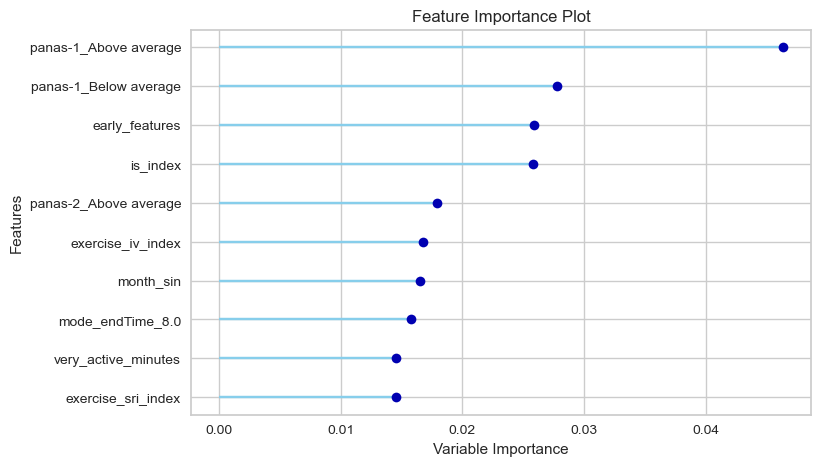

In [36]:
plot_model(best, plot='feature')

In [55]:
df = pd.read_pickle('../data/unified_dataframe/weekly_data_preprocessed.pkl')
panas = df.drop(columns=['date', 'label_stai_stress_category'])
panas = panas[panas['label_panas_negative_affect'].notna()]
y = panas['label_panas_negative_affect']

In [56]:
# create_report(df).show_browser()

In [57]:
cols = ['stress_score', 'steps', 'sleep_duration']
for col in cols:
    extracted_features = extract_features(df, column_id="id", column_sort="date",
                                          n_jobs=5, column_kind=None, column_value=col,
                                          show_warnings=False)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "id"})
    panas = panas.merge(extracted_features, how='left', on=['id'])

Feature Extraction:  39%|███▉      | 7/18 [00:06<00:10,  1.00it/s]


IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(panas)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [ ]:
s = setup(data=train_data, target='label_panas_negative_affect', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

In [ ]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

In [ ]:
plot_model(best, plot='feature')

In [ ]:
d = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(best.coef_[0])}).sort_values(by='Value', ascending=False)

In [ ]:
pd.set_option('display.max_rows', 500)
d.reset_index(inplace=True)
d

In [ ]:
d['Feature']